# 차원축소 파트

## 고윳값 분해 코드

고윳값 분해는

- 대칭행렬일 때와
- 대각행렬일 때 공식이 다르다

In [22]:
import numpy as np

B = np.array([[1, 0.98], [0.98, 1]])  # 대칭행렬
w2, V2 = np.linalg.eig(B)  # w2 는 고윳값 추출 (아이겐벨류), V2는 고유벡터들의 행렬 추출

#명령의 결과로 나오는 고유벡터 행렬은 행이 아니라 열을 고유벡터로 가진다는 점에 주의한다.
#수치계산의 오류로 인해 중복되는 고윳값이 미세하게 다른 값으로 계산될 수도 있다.

print(w2)
print(V2)

# 즉 0.7 0.7이 고유벡터 하나임 - 교재와 같음

[1.98 0.02]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [27]:
# 공분산행렬 B가 대칭행렬이기 때문에
# V2.T와 V2의 역행렬이 같고
# 대칭행렬의 고유값분해는 .T를 써도 된다

np.diag(w2)

array([[1.98, 0.  ],
       [0.  , 0.02]])

In [23]:
V2.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [24]:
V2_inv = np.linalg.inv(V2)  # 역행렬 넘파이
V2_inv

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [29]:
V2 @ np.diag(w2) @ V2_inv

array([[1.  , 0.98],
       [0.98, 1.  ]])

In [30]:
V2 @ np.diag(w2) @ V2.T

array([[1.  , 0.98],
       [0.98, 1.  ]])

## PCA 로 아이리스 차원축소 실습

사이킷런 pca 살펴보기

sklearn.decomposition.PCA(

n_components = None,

copy = True,

whiten = False,

svd_solver = 'auto',

tol = 0.0,

iterated_power = 'auto',

random_state = None)

In [50]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


** sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화 **

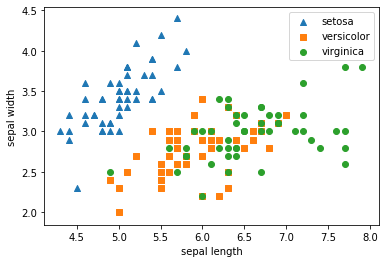

In [51]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 표준화하기 (standardscalar)

분산이 큰 피쳐에 작은 피쳐가 영향을 받기 때문에 표준화 해줘야함

평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환

In [52]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [53]:
iris_scaled.shape

(150, 4)

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)


(150, 2)


In [55]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


## 재차 시각화

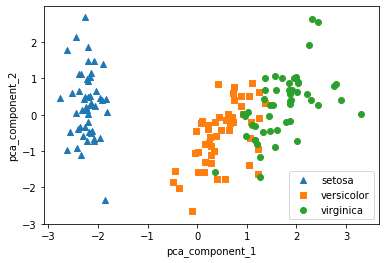

In [56]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## 설명된 분산 비율 알아보기

In [57]:
print(pca.explained_variance_ratio_)

# 변동성 비율을 통해 차원축소로 잃어버린 정보를 파악한다
# 0.7296 + 0.2285 더하면 95%가 된다. 4개의 피쳐를 2개로 합쳐도 95%를 설명했다. 5%는 소실됨

[0.72962445 0.22850762]


## 성능비교

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [59]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88


## PCA로 신용카드 사기 데이터 차원축소


In [60]:
df = pd.read_excel('pca_credit_card.xls', sheet_name='Data', header=1)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [61]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']  # 타겟값 설정
# ID, default 컬럼 Drop
X_features = df.drop(['ID','default'], axis=1) # 타겟 빠진 데이터 X_features 로 만듦

In [62]:
y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [63]:
# null 있는지 파악 (missingno도 있음)

X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(23)
memory usage: 5.3 MB


## 히트맵을 이용한 피쳐 간 상관관계 시각화

- 상관관계가 높은 애들 위주로 결합해 차원을 축소하기 때문

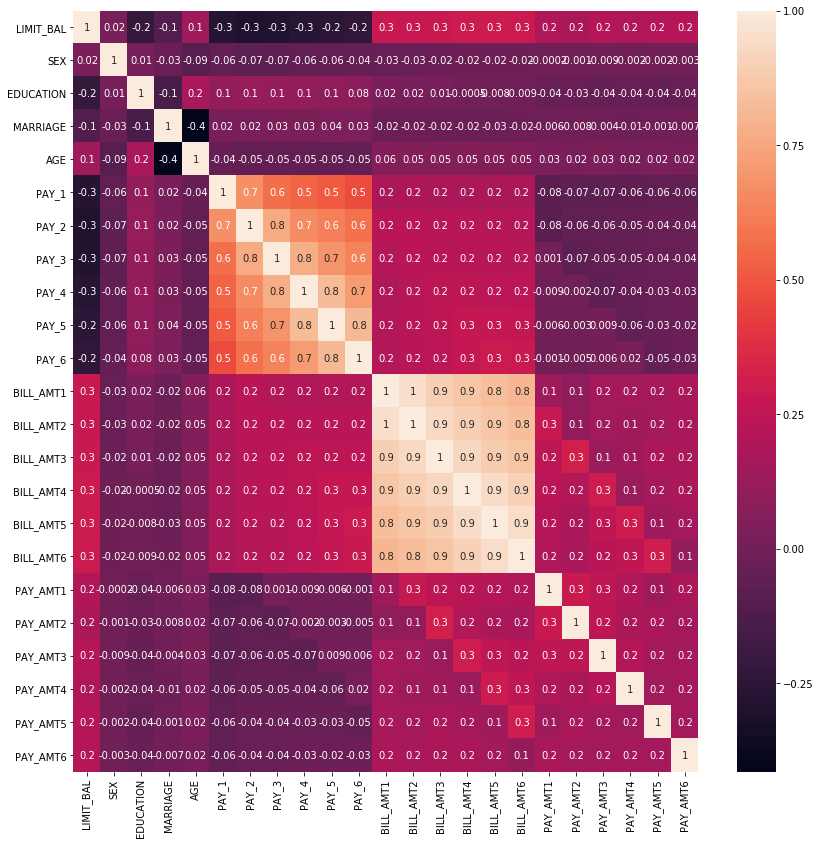

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


## 상관도 높은 순으로 변환

- 살구색으로 나타난 파트 (bill_amt와 pay)

In [65]:
#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성해서 리스트에 담아둠 
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)


# 2개의 PCA 속성을 가진 PCA 객체 생성
scaler = StandardScaler()

# 피쳐명을 리스트에 담아두었기 때문에 꺼내서 스케일링
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])


#pca 적용
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)


print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


## 분류 알고리즘으로 성능평가

- pca 이전 vs pca 하고 난 후

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [67]:
# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7901 0.7967 0.8018]
PCA 변환 데이터 셋 평균 정확도:0.7962


# LDA 적용 (iris)

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시 target값 입력 
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


(150, 2)


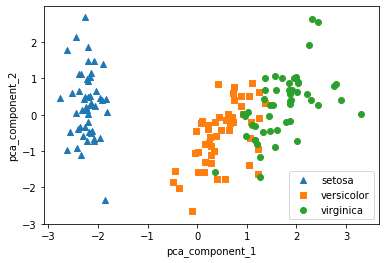

In [70]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()